# Oppimispäiväkirja JODA_k2021 - Simo Uusijoki

## Viikko 1 - Johdanto aihepiiriin

Osallistuin ensimmäisen luentoviikon (9.3.) opetukseen ja alla lyhyt kuvaus tärkeimmistä oppimistani asioista.

Luennolla sai hyvän peruskäsityksen datatieteesstä.

Datatiede on verraten uusi tieteenala (~10v)., jossa yhdistyy liiketoimintaosaaminen, ohjelmointi- ja tietokantaosaaminen, tilastollinen analyysi sekä datalähtöinen viestintä ja visualisointi. Eli datatieteilijän rooli on aidosti monitieteinen. Keskeisimpänä kykynä muokata laajoja aineistoja ja hyödyntää ohjelmointia. Luennolla käytiin läpi myös <a href="http://nirvacana.com/thoughts/2013/07/08/becoming-a-data-scientist/">datatieteen metrokarttaa</a>, josta näkee hyvin kuinka moninaista osaamista hyvältä datatieteilijältä odotetaan.

Dataa on saatavilla uskomattoman paljon. Myös julkisesti avointa dataa on koko ajan saatavilla enemmän ja enemmän. Avoimen datan avulla voidaan kiihdyttää innovaatioprosesseja, kannustamalla eri osaajat yhteisten ongelmien/haasteiden kimppuun.

Sivuttiin myös Data Engineering vs. Data Scientist rooleja. Molemmat datatieteen rooleja. CRISP DM-mallista noin 80% ajasta datan siivoamiseen (Data Engineer) ja vain noin 20% työstä jalostetumpaa, kuten ongelman ymmärtämistä, automatisointia ja analysointia (Data Scientist). 

Erilaisia työvälineitä on myös paljon. Python-pohjaiset ympäristöt ovat tulleet korvaamaan/lisäämään valikoimaa aiemmin käytettyjen tilastolaskentaympäristöihin (R). Kurssin kannalta oleellisimpina työkaluina mainittiin <a href="https://pandas.pydata.org/">Pandas</a>, <a href="https://scikit-learn.org/stable/">Scikit-learn</a> ja visualisointiin <a href="http://holoviews.org/">Holoviews</a>. 

Luennon aikana pohdittiin myös omia tavoitteita kurssista. Oma tavoitteeni kurssille on ymmärtää datatieteen perusteet siten, että voin toimia paremmin projektinjohtajana taloushallinnon kehityshankkeissa, joissa datan hyödyntäminen on läsnä.

Jo tässä kohtaa kurssia mieleeni virtaa ajatuksia työelämän puolelta. Aiemmat kokemukseni esimerkiksi Power BI:n avulla tehtyjen datamallien visualisoinneista ja data migraatio-prosessin automatisoinnista Lavastorm ETL-työkalun avulla, saavat nyt käytännönkokemuksen päälle myös teoreettista ymmärrystä aiheesta. Tästä tulee varmasti mielenkiintoista!

### Viisi oivallusta

- Datatieteessä organisaation yhteiskunnallisen tarkoituksen/roolin ymmärtäminen yhdistyy kykyyn soveltaa moderneja tiedonhankkimiskeinoja ilmiöiden selittämiseen ja toimintatapojen kehittämiseen 
- Datatiede on nykypäivän käsityöläisammatti
- Koodaaminen datatieteessä on lähinnä valmiiden ratkaisujen etsimistä ja soveltamista omaan ongelmaan
- Datatieteessä opeteltavia asioita on loputtomasta -> kannattaa valita itselle tärkeimmät taidot ja keskittyä näiden kehittämiseen (minulle: Fundamentals of ETL, Programming -  Basics of Python, Visualizations (good practices), Toolbox (Excel + PowerBI) )
- Jupyter työkirja on helposti lähestyttävä alusta koodaamisen aloittamiselle

### Kehityskohteet luennolle/materiaaleille

- Hyvä startti, ehkä muutama lyhyehkö video aiheesta olisi hyvä promota opiskelijoille kurssin alkuun. Opiskelijan helpompi lähestyä aihetta lyhyiden videoiden, kuin artikkeleiden kautta. Artikkelit seuraavat luontevasti, kun mielenkiinto herännyt.
- Luennoilla enemmän keskustelua opiskelijoiden kanssa. Hyvänä hetkenä esimerkiksi omien tavoitteiden esittäminen. Kun mikrofonit avautuu heti kurssin alussa, tulee koko kurssista todennäköisesti keskustelevampi.

### Pätkä koodia

Tässä osiossa tulen käymään harjoitustyön avulla oppimaani. Ensimmäisellä viikolla opin hakemaan dataa sekä tuomaan kirjastot työkirjaan. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

# Reading our dataset into a dataframe

URL2021= 'http://data.insideairbnb.com/italy/lombardy/milan/2021-02-17/data/listings.csv.gz'
df2021= pd.read_csv(URL2021, compression='gzip')

URL2019= 'http://data.insideairbnb.com/italy/lombardy/milan/2019-02-07/data/listings.csv.gz'
df2019= pd.read_csv(URL2019, compression='gzip')

C:\Users\simo.uusijoki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Viikko 2 - Datan kerääminen ja jalostaminen

Tämän viikon luennolla (16.3.) käytiin läpi datatieteen prosessia, data-analytiikan liiketoimintarelevanssiutta, data-analytiikan menetelmiä, datan muotoja sekä datan hallitsemista. Luennon lisäksi tutustuin <a href= "https://reader.elsevier.com/reader/sd/pii/S014829631630488X?token=3873593B7BD647BAE2A046C413EDEFF19E616C5509756F758D3AD0027E236B7F6E44A30ED44D68D053FD1B56D3292455&originRegion=eu-west-1&originCreation=20210503104420"> Sivarajahin artikkeliin</a> big datan haasteista ja analytiikan menetelmistä.

Datatieteen prosessi esiteltiin luennolla neljän päävaiheen avulla: (1) tiedon esikäsittely, vuoropuhelu (2) analyysin ja (3) tulosten reflektion välillä ja (4) tulosten viestiminen vastaanottajalle soveltuvassa muodossa. Prosessi on selkeä ja kaikin puolin järkevä. Olen jo aiemmasta työkokemuksesta oppinut, että kun datan kanssa työskentelee on ensiarvoisen tärkeää pohtia tulosten järkevyyttä ja kyseenalaistaa tehtyjä valintoja sekä arvioida koodin oikeellisutta. Prosessi istuu tähän ajatteluun oikein hyvin. 

Kävimme myös läpi Data engeneer ja Data scientist -piirteitä. Known/Unknows kenttien avulla sai hyvän muistutuksen, että objektiivinen ote on tarpeen sillä ymmärryksemme itsestämmekin on usein vääristynyt. Erityisesti Data scientistille on ensiarvoisen tärkeää olla tässä tarkkana sillä heidän työnkuvansa on kokeilevampi ja tutkivampi. 

Käytäessä läpi data-analytiikan liiketoimintarelevanssiutta, korostettiin erityisesti tarvetta lisätä ymmärrystä liiketoimintaprosessista analytiikan avulla. Edelleen reflektoiden omaan työkokemukseeni taloushallinnon raportoinnissa -> samaa mieltä. Olen juurikin omien datan mallinnus ja visualisointiharjoitusteni avulla pyrkinyt ymmärtämään juurisyyt taseen ja tuloslaskelman "tarinaan". Tähän linkittyy myös yllä mainittu viestiminen, joka on ensiarvoisen tärkeää, jotta halutut löydökset ja niihin liittyvät toimenpideehdotukset saadaan kuulluksi.

Luennolle annettiin myös ajatuksen tueksi <a href="https://journals.sagepub.com/doi/pdf/10.1177/0256090920130401">analytiikan nelikenttä</a>, joka jakaa analytiikan neljään alla olevaan teemaan.

- Kuvaileva analytiikka
- Diagnosoiva analytiikka
- Ennakoiva analytiikka
- Ohjaava analytikka

Tästä huomaan, että olen lähinnä päässyt kosketuksiin kuvaileva ja diagnosoivan analytiikan kanssa.

Aiemmin mainitussa Sivarajahin artikkelissa luodaan katsaus big datan ja analytiikan haasteisiin. Artikkelissa tutkitiin yli 200 tieteellistä julkaisua aiheesta ja näiden perusteella saatiin hyvä kuva haasteista joita datan hyödyntäjillä on selätettävänään. Haasteita löytyy niin datasta itsestään, datan prosessoinnista ja analysoinnsta, kuin myös datan hallinnoinnista.

Menetelmistä käytiin läpi ryömijät ja raapijat. Itselle nämä termit olivat aiemmin selittämättömiä, joten oli hienoa saada termeille tarkoitus. Tosiaan ryöminnällä haetaan webbidokumentteja (sivuja), jotka indeksoidaan halutulla tavalla. Esim. Google indeksoi tällä tavalla webbisivut omaan tietokantaansa. Raavintaa hyväksikäyttäen taas tutkitaan yksityiskohtaisemmin sivustoja ja löydetään webbisivujen rakenteen avulla kiinnostavat kohdat.

Datan tyypit käytiin nopeasti läpi. Tämä on varmasti hyödyllistä harjoitustyöhön, sillä eri datatyypit käyttäytyvät eri tavalla niiden ominaispiirteiden mukaisesti.

Datan hallitsemista läpikäytäessä, päästiin myös tutkimaan hieman Pandasin avulla kuinka dataa ajetaan ja saadaan siivottua haluttuun malliin.



### Viisi oivallusta

- ETL vs. DAD <-> Data Engineer vs. Data Scienctist
- Data-analytiikan haasteiden selkeytyminen
- Ryömintä ja raavinta
- Omat kokemukset analytiikasta rajoittuneet historian ymmärtämiseen
- Pandasin käyttäminen harjoitustyössä

### Kehityskohteet luennolle/materiaaleille

- Luennolla olisi voinut käydä enemmän läpi haasteita liittyen analytiikkaprosessiin (Sivarajahin artikkelissa nousseet)

### Pätkä koodia

Harjoitustyössä käytettyä koodia, jota opittiin tämän viikon materiaalien avustuksella.

In [2]:
# Select columns want to be kept
cols = ['id',
'host_is_superhost',
'neighbourhood_cleansed',
'room_type',
'accommodates',
'bedrooms',
'beds',
'price',
'number_of_reviews',
'review_scores_rating',
'availability_365'
]
# read the file and make data frames to have only columns selected above
df2021 = pd.read_csv(URL2021, usecols=cols, compression='gzip')
df2019 = pd.read_csv(URL2019, usecols=cols, compression='gzip')
# Adding column "Year" to both datasets with corresponding year values
df2021 ['Year'] = 2021
df2019 ['Year'] = 2019
dfMilan = df2019.append(df2021)
len (dfMilan.index)

36190

## Viikko 3 - Koneoppimisen periaatteet

Tämän viikon luennolla (23.3.) käsiteltiin koneoppimista. Osallistuin luennon alkupuoliskoon ja tutustuin myös itsenäisesti luentomateriaaliin. Luin lisäksi <a href="https://bilot.group/articles/asiakaspoistuma-analyysi-ja-miljoona-lisamyyntia/">asiakaspoistuma-analyysin</a> sekä suositellun <a href="https://rajapinta.co/2017/10/16/nain-laadullinen-tieto-jalostuu-laskennalliseksi-piirteet-sosiaalisen-median-analytiikassa/">esilukemiston piirteiden erottamisesta</a>. Tutustuin myös datan keräämiseen <a href="https://www.freecodecamp.org/news/how-to-build-a-scalable-crawler-on-the-cloud-that-can-mine-thousands-of-data-points-costing-less-a9825331eef5/">Marcello Linsin kirjoituksen</a> kautta.

Datatitiedeprojekteissa tulee olla liiketoiminnallinen oikeutus, eli käytetylle analytiikka-ajalle tulee seurata tuottoa, joka suurempina tuloina tai pienempinä kuluina. Asiakaspoistuma-analyysin avulla tämä ajatus saatiin hienosti kiteytettyä konkretiaan. Oppimalla tunnistamaan piirteet asiakkaista, jotka ovat poistumassa palveluntarjoajalta, voidaan pyrkiä ennakkoon vaikuttamaan asiakkaiden poistumisaltiiuteen. Parhaimmassa tapauksessa asiakkaat saadaan pidetyksi ja jopa ostamaan lisäpalveluja, oikea-aikaisella ja oikeanlaisella kontaktoinnilla. Tällainen analalyysi oli verraten yksinkertainen toteuttaa, kun (1) selvitetään ylätason olosuhteet, jossa asiakkaat poistuu ja (2) valitaan näistä se jossa nähdään olevan eniten mahdollisuuksia vaikuttaa poistumaan. Tämän jälkeen (3) tutkitaan asiakasdataa ja opitaan piirteet joita poistuvilla asiakkailla on ollut ja (4) mietitään toimenpiteen joilla piirteisiin voidaan vaikuttaa, siten että asiakan ei poistuisi. Asiakkaiden tuomien tulojen ja poistuvien asiakasmäärien avulla on verraten yksinkertaista laskea mahdolliset tuottoennusteet analyysin avulla tehtäville toimenpiteille.

Yllä kuvattu esimerkki oli mieltäni avaava - koneoppiminen ei ole tähtitiedettä. Löydetään malli ja opetetaan koneoppimisen avulla (valmiita työkaluja valmiina käyttöön vino pino) algoritmit tunnistamaan mahdolliset poistujat, joihin vaikuttamikeinoja suunnataan. Koneoppiminen itsessään onnistuu datasetin avulla josta otetaan opetus- ja testidata, joiden avulla malli opetellaan ja testataan toimivaksi (tai ei toimivaksi -> seuraava työkalu kokeiluun). 

Kuten aiemmassa osassa kerroinkin, niin oman työuran aikana ei ole vielä tullut vastaan koneoppimisen hyödyntämisen tarvetta (tai sitä ei ole osannut nähdä), mutta tämä alkoi todella kiinnostamaan! Latasin itselle <a href="https://www.tekoalyaika.fi/raportit/edellakavijana-tekoalyaikaan/">Suomen Tekoälyaika-ohjelman loppuraportin</a> ja laitoin tämän lukulistalleni.

Loppuun vielä ajatuksia koneoppimisen prosessista, kuinka sen itse nyt näen.

(1) Tärkeää on ymmärtää miksi koneoppimista olisi järkevää hyödyntää, sillä itsessään koneoppimisprojektin läpivienti ei ole itseisarvoisesti tuottavaa. Tähän siis loi hyvää pohjaa asiakaspoistuma-analyysistä tehty kirjoitus. (2) Datan hankinta on usein myös haastavaa, sillä joskus sitä ei yksinkertaisesti ole olemassa (esim. organisaation sisällä ei ole ylläpidettty asiakastyytyväisyyden mittaavaa dataa) ja se pitää ensiksi luoda.Big data luo myös omat mahdollisuudet suurien strukturoimattomien datalähteiden hyödyntämiseen, mutta tällaisen datana hankintaan tulee miettiä parhaiten tilanteeseen sopivat työkalut (Marcello Linsin kirjoitus). Kun lopulta "business-case" (=Mitä ja miksi selvitetään sekä mihin haetaan vastausta) on selvä ja data on saatavilla (3) tulee datasta pyrkiä konepppimisen keinoin erottamaan selittäviä piirteitä. Piirteiden selvittämisessä (4) dataa joudutaan usein vielä siistimään ja miettimään mikä algoritmi sopisi koneoppimistilanteeseen parhaiten, ennen kuin päästään (5) jakamaan data sopiviin opetus- ja testidatoihin ja katsomaan millaisiin (kuinka luotettaviin) tuloksiin päästiin. Kun koneoppimisen avulla (6) ollaan saavutettu riittävä selitettävyysaste, voidaan selittävien piirteiden avulla lähteä muuttamaan toimintamallia ja luoda arvoa organisaatiolla.

Luentomateriaalissa oli myös hyvä esimerkki kuinka koneoppiminen saadaan käytännössä tehdyksi - kiitos tästä!


### Viisi oivallusta

- Koneoppiminen ei ole tähtitiedettä
- Koneoppiminen ei ole itseisarvoisesti tuottavaa (materiaalista: 10% yrityksistä löytää sen avulla kannattavan liiketoimintamallin)
- Big Dataa on aidosti hyödynnettävissä, kun osaa tekniikat, ymmärtää prosessin ja ennen kaikkea tietää miksi sitä hyödyntäisi
- Koneoppimiseen on valmiita malleja, joita näyttäisi olevan suht helppo hyödyntää 
- Asia sai minun huomioni - luen tästä varmasti lisää!

### Kehityskohteet luennolle/materiaaleille

- Tässäkin osiossa olisi ollut ehkä paikallaan kuulla myös opiskelijoilta ajatuksia koneoppimisesta ja sen hyödyntämisestä

### Pätkä koodia
Harjoitustyössä käytettyä koodia, jota opittiin tämän viikon materiaalien avustuksella. Koneoppimisen jätin ajanpuutteen vuoksi pieneen rooliin, mutta jotain tehtiin kuitenkin.

<function matplotlib.pyplot.show(close=None, block=None)>

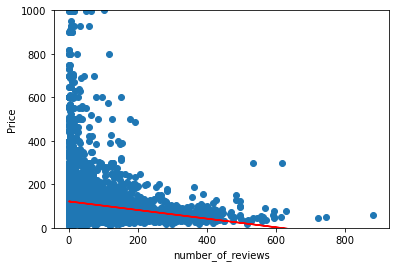

In [5]:
#Datan siivoamista
dfMilan['price'] = dfMilan['price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

dfMilan = dfMilan[dfMilan.bedrooms !=0]
dfMilan = dfMilan[dfMilan.beds !=0]
dfMilan = dfMilan[dfMilan.review_scores_rating !=0]
dfMilan = dfMilan.dropna(axis=0)

#Lineaarinen regressio
lr = linear_model.LinearRegression()
x = dfMilan['number_of_reviews'].values[:, np.newaxis]
y = dfMilan['price']

classifier = lr.fit(x,y)
plt.scatter(x,y)
plt.plot(x, classifier.predict(x), color = 'red')
plt.xlabel('number_of_reviews')
plt.ylabel('Price')
plt.ylim(0,1000)
plt.show

## Viikko 4 - Harjoitustyöhön tutustuminen

Tämän viikon luennon (30.3) katsoin jälkikäteen Panoptosta. Tutustuin myös <a href="https://github.com/InfoTUNI/joda2021/blob/master/koodiesimerkit/airnbn/python_scikit_airbnb.ipynb">Airbnb esimerkkianalyysiin</a>.

Tällä viikolla keskityttiin erityisesti tutkimuskysymyksen ymmärtämiseen, eli päästiin puhtaasta datatieteestä enemmän tietojohtamisen keinojen soveltamisen pariin. Luennolla käytössä oli myös opiskelijoita osallistavampia metodeja (hyvä Jukka!), joita myös itse olen peräänkuuluttanut aiempien viikkojen palautteissa. Ehkä edelleen voisi myös kannustaa mikrofoneja aikaisemaan, niin saataisiin vielä enemmän vuorovaikutteisuutta, mutta hyvä että flinga/miro/breakout-room tulevat jo tutuksi.

Tutkimuskysymystä mietittäessä lähdettiin liikkeelle ongelman määrittämisestä hyödyntäen Airbnbn keissiä. Ohjeistuksena oli eirtyisesti pohtia ongelmaa NABC-mallin avulla, eli 

- (Need) Mikä tarve asiakkaalla on? 
- (Approach) Mikä on sinun uniikki tapa täyttää tarve? 
- (Benefit) Mitkä hyödyt saadaan sidosryhmälle?
- (Competition) Kuinka kilpailullisia hyödyt ovat suhteessa kilpailijoihin ja vaihtoehtoihin?

Tässä kohtaa olin jo itse valinnut omaksi harjoitustyöaiheeksi pandemian vaikutukset Milanon Airbnb-markkinaan, joten en suoranaisesti hyödyntänyt tällä kertaa luentojen ajatuksia omaan harjoitustyöhöni. Oman aiheen valitsin lopulta miettien vain kuinka saan työn datan avulla suoritetuksi, en niinkään mitä hyötyä tästä olisi. Malttamalla työn aloittamisessa hetken, olisin varmasti hyödyntänyt luentokerran antia enemmän harjoitustyössäni.

Joka tapauksessa viikon oppina on asiakaskeskeisyys ja lisäarvon tuottaminen datatiedeprojektin avulla. Yllä mainittua NABC-mallin ajatukset välittyvät myös hienosti mahdollisuus kehikossa (Opportunity Canvas), jonka avulla luennolla ongelmaa lähdetään paikantamaan ja ratkaisuja löytämään. Tämä opportunity canvas otettiin omiin kansiohini talteen, sillä tämän avulla voidaan hienosti lähteä olemassa olevan tuotteen/palvelun kaupallistamista kehittämään. Tärkeintä projektin onnistumiselle ja lisäarvon tuottamiselle on siis liiketoimintaymmärrys. Ilman ymmärrystä haasteista ja mahdollisuuksista, ei datatieteen keinot ja prosessit pysty vastaamaan oikeisiin kysymyksiin.

Luennolla käytiin läpi myös hyvän datatiedeprojektin vaiheet, myös (1) tutkimuskysymyksen ja ongelman määrittämisen jälkeen. Kun on ymmärrys saatu, että minne/mitä varten analyysiä tullaan toteuttamaan seuraa (2) datan hankinta. Tässä vaiheessa on järkevää tunnistaa myös datalähteet, sillä monesti kaikki organisaatiossa oleva tieto ja informaatio ei ole yleisesti tiedossa/saatavilla. Tulee myös ymmärtää, että relevanttia dataa on varmasti saatavilla myös organisaation ulkopuolelta. Kun data on saatu, sitä tulee (3) tarkastella ja käsitellä, jotta siitä saadaan sopivan muotoista ja siistiä analysointiin. Hankittua ja siistittyä dataa on usein (4) tarpeellista myös rikastaa muulla aineistolla, jotta datalähteiden suhteita, riippuvuksia ja vaikutuksia voidaan paremmin ymmärtää. Datan ollessa viimein kasassa kuten sen haluat tässä vaiheessa olevan (5) visualisoi sitä ja ymmärrä tätä kautta mitä se voi kertoa alkuperäiseen ongelmaan liittyen. (6) Datan mallinnus ja ymmärrys mitkä asiat vaikuttavat mihinkä ja koneoppimisen keinot, mikäli näitä oln mielekästä käyttää. (7) Mieti ja pohdi tulokset, ja tee uudestaan sopivasta kohtaa, jotta päästään haluttuun lopputulokseen.

### Viisi oivallusta

- Mieti aina asiakkaan/sidosryhmän silmin, kun lähdet projektia suunnittelemaan ja toteuttamaan (ymmärrä liiketoiminta!)
- Opportunity canvas on hyvä työkalu!
- Datatiedeprojektin prosessi on tietojohtamisen oppien mukainen 
- Onnistumisen päämittarit analytiikkaprosessissa 1) Laatu, 2) Nopeus ja 3) Ratkaisun kestävyys (muokattavuus)
- Haasta valintojasi prosessin joka vaiheessa ja mieti koko ajan voiko jotain tehdä paremmin -> ole valmis muokkaamaan lennosta, jos(kun) huomaat toisen tavan/tutkimuskysymyksen toimivan paremmin! 

### Kehityskohteet luennolle/materiaaleille

- Ohjeistaa entisestään harjoitustyön tekemisessä opiskelijaa siten, että itsenäinenkin tekijä saa prosessista kaikki irti. Esimerkiksi harjoitustyöt "Cheat sheet" voisi toimia. Nyt minä olin jo laittanut "suoritusmoodin" päälle ja asiakasnäkemys jäi hieman paitsioon. Toki tämä olisi pitänyt ymmärtää myös itse, mutta ohjaus ei ikinä haittaa. 

### Pätkä koodia
Harjoitustyössä käytettyä koodia. Tämän viikon luennoilta ei löytynyt paljon omaan työhön, mutta alla kuitenkin koodia jota opin (visualisointi).

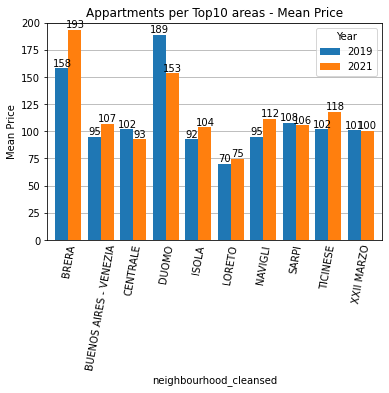

In [7]:
# Todella huono (mutta toimiva) tapa pudottaa ei halutut alueet pois datasta
# Haluttu top10 alueet = 'BUENOS AIRES - VENEZIA','DUOMO','NAVIGLI','SARPI','LORETO','TICINESE', 'BRERA', 'ISOLA','CENTRALE','XXII MARZO']
  
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='TIBALDI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='VIALE MONZA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GUASTALLA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GIAMBELLINO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BANDE NERE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='WASHINGTON']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PORTA ROMANA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='LAMBRATE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='MACIACHINI - MAGGIOLINA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !="CITTA' STUDI"]
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GHISOLFA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='STADERA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='S. SIRO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='S. CRISTOFORO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO LAMBRO - CIMIANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PADOVA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='CORSICA' 'LORETO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='DE ANGELI - MONTE ROSA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BOVISA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='VIGENTINA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BOVISASCA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='LORENTEGGIO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='UMBRIA - MOLISE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BAGGIO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GRATOSOGLIO - TICINELLO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='MAGENTA - S. VITTORE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GARIBALDI REPUBBLICA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PORTELLO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='SACCO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PAGANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='TRE TORRI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO FORLANINI - ORTICA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='LODI - CORVETTO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='RIPAMONTI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='FORZE ARMATE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BARONA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='DERGANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='FARINI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !="NIGUARDA - CA' GRANDA"]
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GRECO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GALLARATESE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='QT 8']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='GIARDINI PORTA VENEZIA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='QUARTO OGGIARO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='MAGGIORE - MUSOCCO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PANE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='QUINTO ROMANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='RONCHETTO SUL NO ROMAN']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO DEI NAVIGLI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='VILLAPIZZONE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='CORSICA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='TORTONA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BRUZZANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO SEMPIONE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='COMASINA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='ADRIANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='EX OM - MORIVIONE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='RONCHETTO SUL NAVIGLIO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='SCALO ROMANA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='SELINUNTE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='QUARTO CAGNINO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='MECENATE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='ROGOREDO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='AFFORI']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='MUGGIANO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='TRIULZO SUPERIORE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !="PARCO MONLUE' - PONTE LAMBRO"]
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO BOSCO IN CITT\x85']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO DELLE ABBAZIE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='RONCHETTO DELLE RANE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='ORTOMERCATO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO NORD']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='BICOCCA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='CANTALUPA']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='TRENNO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='FIGINO']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='CHIARAVALLE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='QUINTOSOLE']
dfMilan = dfMilan[dfMilan.neighbourhood_cleansed !='PARCO AGRICOLO SUD']

# Keskihinnat top10 alueilla 2019 ja 2021
dfMilan_comparison2 = pd.crosstab(dfMilan['neighbourhood_cleansed'],dfMilan['Year'], values=dfMilan.price, aggfunc='mean')

dfMilan_comparison2.plot.bar(width = 0.8, rot = 80, zorder = 2)

plt.title('Appartments per Top10 areas - Mean Price')
plt.ylabel('Mean Price')

plt.grid(axis = 'y')
plt.tick_params(axis = 'x', length = 0)
plt.ylim(0, 200)

for bar in plt.gca().patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f}'.format(y)
    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')



## Viikko 5 - Vierailijaluento luonnollisen kielen analyysistä

Tämän viikon oppeihin tutustuin jälkikäteen materiaalien pohjalta.

Asiana siis luonnollisen kielen prosessointi, eli NLP ja tästä oli puhumassa Solitan Teemu Mikkonen ja Timo Lehtonen. Asiana NLP oli itselle entuudestaan melko vieras, sillä omat ajatukset ja kokemukset datasta ovat olleet hyvin rajoittuneet numeeriseen dataan. Eli mielenkiintoista ja jälleen omaa ajattelua avaavaa asiaa.

Luennolla käytiin hyvin läpi mitä NLP on ja esimerkin avulla päästiin katsomaan kuinka sitä voidaan hyödyntää. Esimerkki datan oli eduskuntadataa, eli tarkemmin ministereiden vastauksia kirjallisiin kysymyksiin. NLP:n ja koneoppimisen avulla pyrittiin tunnistamaan datan pohjalta minkä ministeriön tekstistä on kysysmys. Tässä onnistuttiin, eli koneoppimista hyödyntäen päästiin tekstien sisältöön kiinni ja opittiin tunnistamaan eri ministeriöille tyypillistä kirjoitusta. NLP on siis luonnollisen kielen analysointia datatieteen keinoin, jossa korostuvat tekstin esikäsittelyn tärkeys, jotta tekstille saadaan rakennetta ja numeerista muotoa datatieteen prosessin sekä työkalujen hyödynnettäväksi.

NLP:n hyödyntäminen alkaa tietenkin oikeiden ja osuvien kirjastojen latauksesta, jonka jälkeen voidaan haluttu data ladata ja lähteä katsomaan tarkemmin miltä data näyttää. Oli mukava huomata, että myös NLP:n hyödyntäminen noudattaa hyvin pitkälti samaa datatiedeprojektin prosessia, johon olemme päässeet harjoitustyötä tehdessä tutustumaan. Eli datan esikäsittely on suuressa roolissa myös NLP-prosessissa. Esikäsittelyssä sanoista tehtiin yhdenmukaisia, jotta saadaan tektille luotua rakennetta ja muutettua teksti numeeriseen, laskettavaan muotoon. Tätä tehtiin muun muassa isot alkukirjaimet ja sijamuodot poistamalla sekä siivoamalla tesktiä poistamalla analyysin kannalta turhat täytesanat (kuten prepositiot). Kun teksti oli siivottu ja luokiteltu, voitiin ottaa koneoppimisen keinot käyttöön. FastText NLP-kirjaston avulla saatiin sanoista sanavektoreita kontekstin perusteella, joita pystyy hyödyntämään koneoppimisessa. Tiettyjä opetusparametrejä hyödyntäen saatiin datasetti oppimaan piirteet ja tunnistamaan minkä ministerin tekstistä on kyse. Toki tulokset näyttävät, että tällä datamäärällä ja parametreillä ei aina osuta oikein ministerin suhteen, ja tulee muistaa että poliitikkojen kieli on usein samankaltaista riippumatta ministeriöstä. Mutta kaiken kaikkiaan prosessi näyttää mahdollisuutensa sekä rajoitteensa hyvin, esimerkin avulla.

Hienoa huomata, että tekstiäkin pystytään melko näppärästi tutkimaan datatieteiden avulla. Tämä on hyvä ymmärtää, kun datatieteiden soveltamista pohtii, sillä usein oma mieli jää liiaksi numeerisen dataan kiinni.

### Viisi oivallusta

- Kieltäkin voi analysoida
- ...mutta luonnolisessa kielen rakenteellistamisessa ja siivoamisessa voi tapahtua hallaa datan luotettavuudelle/objektiivisuudelle
- NLP prosessi on ymmärrettävä
- NLP prosessi on datatieteen yleisen prosessin mukainen
- Solita yrityksenä nyt tutumpi

### Kehityskohteet luennolle/materiaaleille

- Tähän materiaaliin olisi toivonut tutkimuksia ja lähteitä tueksi, jotta opiskelija olisi halutessaan voinut syventyä asiaan ammattilaisten validoitujen lähteiden kautta 

### Pätkä koodia
NLP ei ole osana harjoitustyötä eikä ollut asia johon olen tutustunut. Luentomateriaalissa oli kuitenkin hyviä esimerkkejä datan ja tekstin siivoamiseen. Päädyin tällä viikolla lainaamaan mielenkiintoisen koodin pätkän suoraan vierailijaluennolta.  

In [9]:
import re #Regex
text="Kaikkea hyvältä tuntuvaa on parempi opetella tekemään ennemmin kuin vuonna 2030!! Tämä siksi, että on parempi tuntua hyvältä jo tänään!"

#Erikoismerkkien poisto:
words = text.split(" ") #Tehdään tekstin sanoista lista, jota voidaan esikäsitellä sana kerralaan

preprocessed_words = [] #Tyhjä lista esikäsitellyille sanoille

for word in words:
  word = re.sub("[^A-Za-z0-9ÄäÖö-]+", "", word) #Poistetaan regexin avulla kaikki merkit paitsi A-Ö-kirjaimet ja numerot
  word = re.sub("-", " ", word) #Muutetaan regex-komennon avulla kaikki väliviivalliset sanat eri sanoiksi vaihtamalla viivan tilalle välilyönti
  word = word.strip().lower() #Poistetaan sanan ympäriltä ylimääräiset välilyönnit ja muutetaan kaikki kirjaimet pieniksi
  if len(word) > 2:  #Hylätään kaikki kaksi merkkiä lyhyemmät merkkijonot
    preprocessed_words.append(word) #Lisätään sana esikäsiteltyjen sanojen listaan

text_sc = " ".join(preprocessed_words) #Liitetään listan sanat toisiinsa välilyönnein
print("Alkuperäinen teksti: ", text)
print("Erikoismerkit poistettu:", text_sc)

Alkuperäinen teksti:  Kaikkea hyvältä tuntuvaa on parempi opetella tekemään ennemmin kuin vuonna 2030!! Tämä siksi, että on parempi tuntua hyvältä jo tänään!
Erikoismerkit poistettu: kaikkea hyvältä tuntuvaa parempi opetella tekemään ennemmin kuin vuonna 2030 tämä siksi että parempi tuntua hyvältä tänään


## Viikko 6 - Ohjaamaton oppiminen

Tämän viikon materiaalin katoin jälkikäteen. Luennon lisäksi katsoin myös demosession sekä tutustuin materiaaliin   <a href="https://www.slideshare.net/NarongIntiruk/begin-with-machine-learning-71507363">Begin with machine learning</a>  sekä <a href="https://cloud.google.com/blog/topics/public-datasets/google-patents-public-datasets-connecting-public-paid-and-private-patent-data">Googlen prosessikuvaan</a>.

Tämän viikon luennolla käytiin siis läpi ohjaamattoman oppisen menetelmiä, joita ovat esimerkiksi ryvästäminen, aihemallinnus, ostoskorianalyysi ja verkostoanalyysi. Näistä ryvästämiseen ja aihemallinnukseen tutustuttiin paremmin luennolla. Ryvästämisessä pyritään löytämään riittävä määrä klustereita joihin data jakamalla saadaan datan variannssi selitettyä riittävän hyvin. KMeans-klusterointi jota luennolla käsiteltiin, määrittää klusterien rajat niin, että eri klustereiden keskipisteet olisivat mahdollisimman kaukana toisista. Näin saadaan tulokseksi selkeimmin eroteltuja klustereja. Ryvästäminen vaikuttaa todella mielenkiintoiselta tavalta saada datamassasta piirteitä esiin. Tässäkin metodissa on tietysti omat haasteensa. Luennon esimerkissä käytettiin elokuva-dataa, jota siivottiin ja päädyttiin käyttämään muutamaa numeeirsta atribuuttia. Näistäkin rajauksista huolimatta tuloksia analyysydoissa huomattiin, että KMeans-klusterointi oli jakanut datan pelkästään elokuvan saamien arvostelujen mukaan, koska tämä oli ainoa atribuutti joka oli normaalisti jakaantunut aineistossa. Eli esimerkissä ryvästäminen antoi saman tuloksen, kun olisi jaettu data luokkiin arvostelujen mukaan. Garbage in -> garbage out!

Toinen luennon esimerkki oli aihemallinnus. Tässä siis hyödynnettiin saman elokuva-aineiston sisään ja käytettiin hyväksi tekstimuotoista kuvaus(overview)-kenttää aihemallinnukseen. Sukellettiin tekstin siään ja pyrittiin löytämään sanoihin liittyvä aiheita, jotka edelleen voidaan sitoa dokumentteihin joissa sanat ovat (=kuvaukset). Datan siivoamisen jälkeen ja analyysin kannalta tarpeettomien sanojen/merkkien poistamisen jälkeen, käytettiin sopivia työkaluja ja algoritmejä aihemallinnukseen (Gensim, KL-divergenssi). Tällä keinolla saadaan siis selville millä todennäköisyydellä sana (ja tätä kautta dokumentti) kuuluu mihinkin aiheeseen. Tuloksena saatiin kolme piilevää teemaa joihin kuuluvia todennäkoisimpien sanojen listaa luennolla katsottiin. Listasta itsestään ei voida suoraan helposti nähdä mikä mallinnuksen tuottama aihe itseasiassa on, mutta liittämällä aiheet osaksi kuvauksia ja elokuvien nimiä, voidaan edelleen löytää aiheille nimet/kuvaukset ja ymmärtää tätä kautta dataa paremmin. Tässäkin haasteita tietysti on. Jo itse datan siivous saatta poistaa tärkeää tietoa tai jättää turhaa ja tuloksia vääristävää dataa. Myös mallinnukseen käytetty kuvaus on itsessään kyseenalainen atribuutti, kun tämä on jonkun subjekitiivisesti kirjoittama teksti. Paremman aihemallinnuksen tarjoaisi varmasti elokuvan käsikirjoitus, mutta tämän käyttöön liittyy omat haasteensa (datan saatavuus, kerääminen, muodostaminen).

Demossa käytiin ostoskori-analyysiä läpi, eli kuinka määrittää haluttujen/kulutettujen tuotteiden avulla mitä tuotetta Y halutaan myös, kun tuote X valitaan. Esimerkiksi nachojen kanssa todennäköiseksi halutaan myös kastiketta/dippiä. Tällä tiedolla voidaan helposti kohdentaa markkinointia ja sijoittaa tuotteet kaupassa siten, että maksimoidaan houkutukset ja tätä kautta myynti. Tämä analyysi toimii assosiaatio-sääntöjen avulla ja esimerkissä käytetään apriori-algoritmiä. Tulokset myös visualisoidaan verkosto visualisoinnin avulla. Selkeä prosessi ja hyvin havainnolliset tulokset!

Verkostoanalyysin materiaali-linkki ei jostain syystä itselle auennut ja en tähän lähtenyt tällä viikolla kummemmin perehtymään.

Jälleen opettavainen viikko ja edelleen korostuu datatieteessä datan laatu ja siihen valittujen toimenpiteiden (siivous, muokkaus) vaikutukset tuloksiin. Luennolta poimittuna (Jukka H.) "Puhuuko data vai analyytikko?" on hienosti kitetytetty kysymys joka tulee pitää koko ajan mielessä. Myös saatujen tulosten ymmärtäminen tehtyjen valintojen ja menetelmien kautta on ensiarvoisen tärkeää, eli muista kysyä "Miksi tämä tulos ja mitä tämä tarkoittaa?".

### Viisi oivallusta

- Ryvästämisen ajatus - klustereiden keskipisteiden sijainti klustereiden jakoperustana (KMeans)
- Jo muutama klusteri saattaa lohkoa dataa tarkasti ja auttaa selittämään datamassaa
- Ohjaamattoman oppimisetn hyödyntämismahdollisuudet myös luonnolliseen kieleen, aihemallinnus + viime viikon prosessi
- "Puhuuko data vai analyytikko?" ja myös ohjaamattomassa oppimisessa tapahtuu ohjaamista (kulstereiden määrä, aiheiden määrä) --> eksploratiivinen analytiikka keskeinen osa prosessia 
- "Garbage in, garbage out"

### Kehityskohteet luennolle/materiaaleille

- Mikrofonin aukaiseminen opiskelijoilta antaisi jälleen tilaa dialogille ja syventäisi oppimista keskustelun kautta. Kun kysytään mielekkyyttä elokuvien aiheista, niin tämä olisi ollut todella hedelmällinen alusta keskustelulle koko ryhmän kesken (tai breakout rooms). 

### Pätkä koodia
Ohjaamatonta oppimista ei myöskään harjoitustyöstäni löydä, mutta tutustuin hieman vielä tuohon tekstin siivoamiseen. Löysin mielenkiintoisen <a href="https://towardsdatascience.com/a-guide-to-cleaning-text-in-python-943356ac86ca">sivun</a>, jossa käytiin eri tekniikoita läpi. Alla mielestäni hyvä esimerkki sanojen perusmuotoistamiseen.

In [14]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
words = ["walk", "walking", "walked", "walks", "ran", "run", "running", "runs"]

# example of stemming
stemmer = PorterStemmer()
for word in words: 
    print(word + " ---> " + stemmer.stem(word))
   

walk ---> walk
walking ---> walk
walked ---> walk
walks ---> walk
ran ---> ran
run ---> run
running ---> run
runs ---> run


## Viikko 7 - Visuaalinen analytiikka

Tämän viikon luennon katsoin jälkikäteen. Lisäksi luin ennen luentoa artikkelin Data tuotteen luomisen prosessista <a href="https://andor.tuni.fi/discovery/fulldisplay?context=PC&vid=358FIN_TAMPO:VU1&tab=Everything&docid=proquest1831862457">(Designing and Developing Analytics-Based Data Products)</a> ja <a href="https://www.youtube.com/watch?v=hsfWtPH2kDg">Heerin videon visualisoinnista</a>.

Pääpointtina tällä viikolla oli kurkistaa koneoppimisen ja datatieteen perusprosessin jatkoksi vielä hieman visualisointeihin ja visuaaliseen analytiikkaan. Viikon oppien mukaisesti visualisoinnit voi olla läsnä sekä raakadatan tutkimisessa (eksploratiivinen analytiikka), että osana tulosten viestintää (kommunikointi). Monesti visualisoinnit mielletään osaksi viestintää, mutta kuten olemme jo harjoitustyössäkin huomanneet, niin visualisoinnit ovat tärkeä osa aineiston ymmärtämistä ja usein ratkaiseva palanen määriteltäessä sopivia datan rajaamisia/siivoamisia sekä koneoppimisen keinoja.

Palataan vielä yllä mainittuun artikkeliin (Designing and Developing Analytics-Based Data Products), jonka tärkein oppi oli datatuotteen luomisen prosessi. Prosessi mukaili datatieteestö (ja tietojohtamisesta yleisesti) tuttua kaavaa: (1) tuotteeen/palvelu-idean konseptointi, (2) datan hankinta, (3) datan puhdistus/jalostus, (4) säilytys ja toistettavuus, (5) palvelun jakaminen, (6) palvelun esitys (UI, UX) ja (7) markkinoilta saadun palautteen hyödyntäminen kehitykseen. Lisäksi muistutettiin sidosryhmien mukana pitämistä prosessin alusta alkaen, ymmärtäen toki ketä missäkin vaiheessa on tarpeen pitää matkassa.

Kun sovelletaan visualisointia datatuotteen luomiseen, huomataan että molempia edellä mainittuja sovelluksia (eksploratiivinen analytiikka ja kommunikointi) on syytä pitää mukana tässäkin prosessissa. Itselle tämä oli hyvä herätys. Olen aikeissa työuralla suuntautua enemmän ja enemmän tietolähtöiseen (sen kaikissa DIKW-muodoissaan) kehittämistyöhön ja visualisoinnin nostaminen kiinteäksi osaksi onnistunutta projektia kuulostaa järkevältä. Myös Heerin key notes -video antoi hyvin tukea siihen kuinka visualisointia voi edelleen viedä osaksi jopa koneoppimisen avulla tehtävää palvelua (DataWrangling -> Trifacta.com). Heer muistutti myös hyvin visualisointien haasteista ja päätöksistä, joita jokaisessa visualisoinnin käytössä tulee miettiä, kuten:

- Kuinka pitkälle automatisoidut visualisoinnit? *automaatio -> kontrollin menetys dataan, vähemmän intuitivinen*
- Kuinka paljon käyttäjällä mahdollisuuksia? *ihminen -> mielen vinoumat, virheet*

Luennolla käytiin myös vielä Ben Fry:n (2008) visualisoinnin prosessi, joka pääpiirteissään noudattaa myös datatieteen työprosessia. Eli visualisoinnillekin on hyvin prosesseja ja kehyksiä tarjolla, joiden mukaan soveltaa käytäntöön. Kävimme myös läpi visualisointien virheitä, jotka olivat myös hyvin havainnollisia (193% piirakka, silputut piirakat ja leikattu y-akseli). Pääpointtina, että mieti miten visualisoit ja tähän apua saa <a href="https://datavizproject.com">täältä</a> (Kiitos Jukka linkistä!).

Luennon lopuksi esitettiin vielä visualisointeja Airbnb-dataan streamlit sovelluksen avulla. Tämä oli myös hyvä. Vaikutti todella helppokäyttöiseltä ja helposti sovellettavissa olevaksi - liitetty omaan "cheat sheettiin"!


### Viisi oivallusta

- Muista miettiä alkuun miksi visualisoidaan ja sitten miten kannattaa visualisoida (<a href="https://datavizproject.com/">vinkkjä</a>)
- Visualisoinnit myös osana datatiedeprojektin työvaiheita (eksploratiivinen analytiikka)
- Koneoppimisen hyödyntäminen visualisoinninssa (Heerin video)
- Mieti miten ihminen kokee visualisoinnin -> Piirakat harvoin hyviä!
- Streamlit muistiin!

### Kehityskohteet luennolle/materiaaleille

- Ehkä tällaisessa luennossa, jossa käydään läpi visualisointeja, voisi vielä enemmän painottaa visualisointien käyttövaikutuksia esimerkein. Eli lisää hyviä case esimerkkejä kuten oli ei toivottavat visualisoinni --> myös hyvät visualisoinnit ja sovellukset estradille, kiitos (Streamlitin näyttäminen lopussa oli hyvä!)

### Pätkä koodia

Pienellä Googlettelulla löysin <a href="https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f">sivuston</a> josta löytyi hyviä visualisointikoodeja aloittelijalle. Alla olevan histograafin saa tehtyä oheisen koodin avulla.

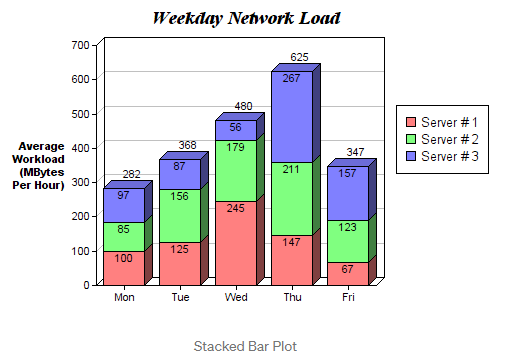

In [18]:
def stackedbarplot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')